In [1]:
import pandas as pd
import plotly as px
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
#from scipy.stats import linregress
#import scipy.stats as st


In [2]:
#save path to data set 
NEregion_path="Northeast_data.csv"

In [3]:
# Use Pandas to read data
NEregion= pd.read_csv('Northeast_data.csv')
NEregion

,State,Region,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Connecticut,Northeast,Male,Excellent,0,0,Within past 2 years (1 year but less than 2 ye...,Yes,6,1 to 5,...,1.68,68.04,24.21,No,Yes,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
1,Connecticut,Northeast,Female,Fair,10,0,Within past year (anytime less than 12 months ...,No,7,None of them,...,1.57,70.76,28.53,Yes,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
2,Connecticut,Northeast,Female,Excellent,0,0,Within past year (anytime less than 12 months ...,No,7,None of them,...,1.63,61.23,23.17,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
3,Connecticut,Northeast,Female,Good,0,0,Within past year (anytime less than 12 months ...,Yes,7,1 to 5,...,1.55,70.31,29.29,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
4,Connecticut,Northeast,Female,Very good,2,4,Within past 5 years (2 years but less than 5 y...,Yes,8,1 to 5,...,1.57,77.11,31.09,No,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56903,Vermont,Northeast,Female,Good,0,0,Within past year (anytime less than 12 months ...,No,7,1 to 5,...,1.57,56.70,22.86,No,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
56904,Vermont,Northeast,Female,Excellent,0,5,Within past year (anytime less than 12 months ...,Yes,8,None of them,...,1.73,70.31,23.57,Yes,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
56905,Vermont,Northeast,Male,Very good,1,1,Within past year (anytime less than 12 months ...,No,6,None of them,...,1.78,61.23,19.37,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Tested positive using home test without a heal...
56906,Vermont,Northeast,Male,Very good,0,10,5 or more years ago,Yes,4,None of them,...,1.93,92.99,24.95,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No


In [4]:
# Heart Attack totals
Heart_Attack_status = NEregion["HadHeartAttack"].value_counts()
Heart_Attack_status

No     53963
Yes     2945
Name: HadHeartAttack, dtype: int64

In [5]:
Heart_Attack_status_df= pd.DataFrame({"HadHeartAttack":["Yes","No"],
                               "Total":["53963","2945"] })
Heart_Attack_status_df.head()

,HadHeartAttack,Total
0,Yes,53963
1,No,2945


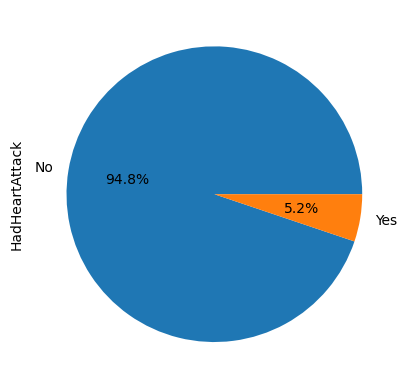

In [6]:
Heart_Attack_status = NEregion["HadHeartAttack"].value_counts()
Heart_Attack_status.plot.pie(autopct = "%1.1f%%")
plt.show()

In [7]:
states_NorthEast= NEregion.groupby(["State"])["HadHeartAttack"].count()
states_NorthEast

State
Connecticut             5053
Delaware                2155
District of Columbia    1725
Maine                   6013
Maryland                9165
Massachusetts           5465
New Hampshire           3756
New Jersey              3967
New York                8923
Pennsylvania            2729
Rhode Island            3112
Vermont                 4845
Name: HadHeartAttack, dtype: int64

In [15]:
Heart_Attack_status = NEregion[NEregion['HadHeartAttack']==1.groupby('State').size
xvalue=np.arange(len(states_NorthEast))
yvalue=states_NorthEast
plt.bar(xvalue,yvalue, color='Red', width=0.5)
tick_locations = [value for value in xvalue]
plt.xticks(tick_locations, ["Connecticut", "Delaware", "District of Columbia", "Maine", "Maryland ", "Massachusetts", "New Hampshire",
                            "New Jersey", "New York", "Pennsylvania", "Rhode Island", "Vermont",
                           "Virginia", "West Virginia"], rotation="vertical")
plt.show()

SyntaxError: invalid decimal literal (736707184.py, line 1)

In [39]:
#Stroke Information 
Stroke_Status=NEregion["HadStroke"].value_counts()
Stroke_Status

0    54794
1     2114
Name: HadStroke, dtype: int64

In [40]:
Stroke_Status_df=pd.DataFrame({"HadStroke":["Yes","No"],
                               "Total":["54794","2114"] })
Stroke_Status_df

,HadStroke,Total
0,Yes,54794
1,No,2114


In [41]:
#find out how many where Smokers
smoker_status = NEregion["SmokerStatus"].value_counts()
smoker_status

Never smoked                             34252
Former smoker                            16616
Current smoker - now smokes every day     4329
Current smoker - now smokes some days     1711
Name: SmokerStatus, dtype: int64

In [11]:
smoker_status_df= pd.DataFrame({"Smoker Status": ["Never smoked", "Former smoker", "Current smoker-now smokes every day","Current smoker-now smokes some days"],
                               "Total": ["34252","16616","4329","1711"]})
smoker_status_df.head()

,Smoker Status,Total
0,Never smoked,34252
1,Former smoker,16616
2,Current smoker-now smokes every day,4329
3,Current smoker-now smokes some days,1711


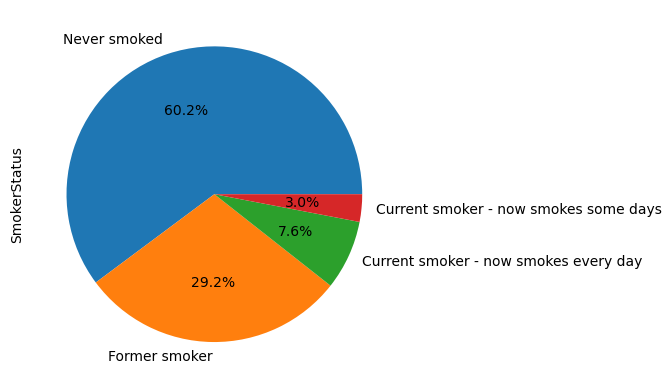

In [14]:
smoker_status = NEregion["SmokerStatus"].value_counts()
smoker_status.plot.pie(autopct = "%1.1f%%")
plt.show()

In [15]:
#E cigarette info
Ecigarette_Status= NEregion["ECigaretteUsage"].value_counts()
Ecigarette_Status

0    44770
1     9688
2     1367
3     1083
Name: ECigaretteUsage, dtype: int64

In [104]:
Ecigarette_Status_df= pd.DataFrame ({"ECigaretteUsage": ["Never used e-cigarettes in my entire life", "Not at all (right now)", "Use them every day", "Use them some days"],
                                     "Total":["44770","9688","1367","1083"]})
Ecigarette_Status_df
                                

,ECigaretteUsage,Total
0,Never used e-cigarettes in my entire life,44770
1,Not at all (right now),9688
2,Use them every day,1367
3,Use them some days,1083


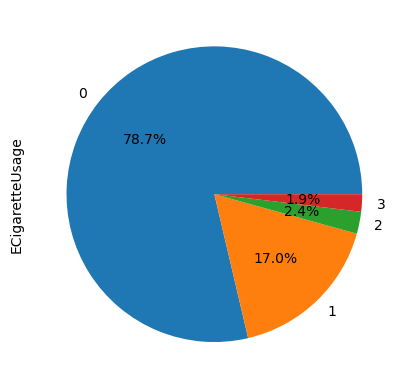

In [17]:
Ecigarette_Status = NEregion["ECigaretteUsage"].value_counts()
Ecigarette_Status.plot.pie(autopct = "%1.1f%%")
plt.show()

In [18]:
#calculate the amount of each gender 
gender_count = NEregion["Sex"].value_counts()
gender_count

Female    29669
Male      27239
Name: Sex, dtype: int64

In [32]:
gender_count_df=  pd.DataFrame ({"Sex":["Female","Male"],
                               "Total":[" 29669","27239"] })
gender_count_df.head()

,Sex,Total
0,Female,29669
1,Male,27239


In [34]:
BMI_Average_States = NEregion.groupby(["State"])["BMI"].mean()
BMI_Average_States

State
Connecticut             28.219652
Delaware                29.212404
District of Columbia    27.114139
Maine                   28.526088
Maryland                28.763478
Massachusetts           27.763153
New Hampshire           28.033182
New Jersey              27.966910
New York                28.163643
Pennsylvania            28.754287
Rhode Island            28.142844
Vermont                 27.634991
Name: BMI, dtype: float64

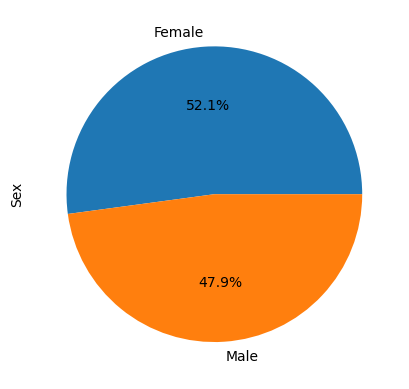

In [23]:
gender_count = NEregion["Sex"].value_counts()
gender_count.plot.pie(autopct = "%1.1f%%")
plt.show()

In [24]:
Ethnicity=  NEregion["RaceEthnicityCategory"].value_counts()
Ethnicity

White only, Non-Hispanic     44128
Black only, Non-Hispanic      5488
2                             4477
4                             1949
Multiracial, Non-Hispanic      866
Name: RaceEthnicityCategory, dtype: int64

In [25]:
Ethnicity_df=pd.DataFrame ({"RaceEthnicityCategory":["White only, Non-Hispanic","Black only, Non-Hispanic","Hispanic","Other race only, Non-Hispanic","Multiracial, Non-Hispanic"],
                               "Total":[" 44128","5488","4477","1949","866"] })
Ethnicity_df

,RaceEthnicityCategory,Total
0,"White only, Non-Hispanic",44128
1,"Black only, Non-Hispanic",5488
2,Hispanic,4477
3,"Other race only, Non-Hispanic",1949
4,"Multiracial, Non-Hispanic",866


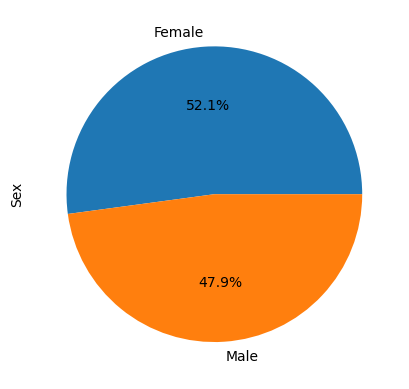

In [26]:
Ethnicity = NEregion["Sex"].value_counts()
Ethnicity.plot.pie(autopct = "%1.1f%%")
plt.show()

In [118]:
General_Health=NEregion.groupby(['GeneralHealth'])['State'].count()
General_Health

GeneralHealth
0    10686
1    21366
2    16876
3     6250
4     1730
Name: State, dtype: int64

In [119]:
General_Health=NEregion[NEregion['GeneralHealth']==1].groupby('State').count()
General_Health

,Region,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
State,,,,,,,,,,,,,,,,,,,,,
Connecticut,1901,1901,1901,1901,1901,1901,1901,1901,1901,1901,...,1901,1901,1901,1901,1901,1901,1901,1901,1901,1901
Delaware,774,774,774,774,774,774,774,774,774,774,...,774,774,774,774,774,774,774,774,774,774
District of Columbia,641,641,641,641,641,641,641,641,641,641,...,641,641,641,641,641,641,641,641,641,641
Maine,2369,2369,2369,2369,2369,2369,2369,2369,2369,2369,...,2369,2369,2369,2369,2369,2369,2369,2369,2369,2369
Maryland,3409,3409,3409,3409,3409,3409,3409,3409,3409,3409,...,3409,3409,3409,3409,3409,3409,3409,3409,3409,3409
Massachusetts,2064,2064,2064,2064,2064,2064,2064,2064,2064,2064,...,2064,2064,2064,2064,2064,2064,2064,2064,2064,2064
New Hampshire,1520,1520,1520,1520,1520,1520,1520,1520,1520,1520,...,1520,1520,1520,1520,1520,1520,1520,1520,1520,1520
New Jersey,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483,...,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483
New York,3167,3167,3167,3167,3167,3167,3167,3167,3167,3167,...,3167,3167,3167,3167,3167,3167,3167,3167,3167,3167
